# 1
Link to chatgpt: https://chatgpt.com/c/673fa7ea-c68c-8010-b235-ddd3bf05fc6b

# 2

1. Accuracy: Detectuion of spam emails

Accuracy is useful for understanding how often emails are classified correctly (spam - true positives vs non spam - true negatives).

2. Sensitivity: Cancer Screening

Since the cost of missing a true positive (false negative) is high because it prevents the ability to seek necessary treatment, sensitivity is crucial for this case.  

3. Specifity: Detecting fraudulent transactions in a financial system

If the system wrongly flags legit transactions as fraud, it could cause sissatisfaction, blocked account and unnecessary intervention.

4. Precision: Online ad targeting for a product

Prcision would be used to measure customer likehihood of buying the product. High precsision means that marketing to targeted towards the right audience, reducing wasted spending on adertisment and improving return on investment.



Link to chatgpt: https://chatgpt.com/c/673fa8c7-d1ac-8010-9494-cc73a3ec1b1e

Summary:

We discussed four important metrics used in evaluating models: Accuracy, Sensitivity, Specificity, and Precision. I provided real-world examples for each:

Accuracy: Useful in spam email detection, where it measures how often the system classifies emails correctly but can be misleading in imbalanced datasets.
Sensitivity: Important in cancer screening to correctly identify those who actually have cancer, minimizing false negatives.
Specificity: Key in fraud detection systems, where high specificity ensures legitimate transactions aren’t mistakenly flagged as fraudulent.
Precision: Relevant in online ad targeting, where it measures how many of the users identified as likely buyers actually make a purchase, reducing wasted ad spend.

# 3

In [51]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

del ab['Weight_oz']
del ab['Width']
del ab['Height']

ab = ab.dropna()

ab['Pub year'] = ab['Pub year'].astype('int64')
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010,393934942,0.9


# 4

In [50]:
# Set random seed for reproducibility
np.random.seed(130)

# Select 80% of the data for training
training_indices = ab.sample(frac=0.8, replace=False).index.sort_values()

# Select the remaining 20% for testing
testing_indices = ab.index[~ab.index.isin(training_indices)]

# Split the data
X_train = ab.loc[training_indices, ['List Price']]
y_train = pd.get_dummies(ab.loc[training_indices, "Hard_or_Paper"])['H']

X_test = ab.loc[testing_indices, ['List Price']]
y_test = pd.get_dummies(ab.loc[testing_indices, "Hard_or_Paper"])['H']

Number of training observations (len(X_train)): 225
Number of testing observations (len(X_test)): 64

link to chatgpt: https://chatgpt.com/c/673fbb50-a528-8010-90f8-e7371dceb395

Summary:

Data Splitting:

We discussed how to split a dataset into training and testing sets, using both the train_test_split function from scikit-learn and the sample() method from pandas.
We focused on performing an 80/20 split, where 80% of the data is used for training and 20% for testing.
Initially, you encountered an error regarding the ab_reduced_noNaN variable not being defined. We clarified that the correct variable name should be used (e.g., df or ab), depending on your dataset.
You later used the ab DataFrame and learned how to split it using the correct isin method for identifying the testing set.
Decision Tree Model:

We discussed how to fit a DecisionTreeClassifier to predict whether a book is a hardcover or paperback using only the List Price variable.
We used the max_depth=2 parameter for the decision tree and plotted the tree using plot_tree.
Error Fixing:

You made a small mistake when defining testing indices in your code (~ab.isin(training_indices)), which was corrected to ~ab.index.isin(training_indices) to properly generate the testing set.

# 5

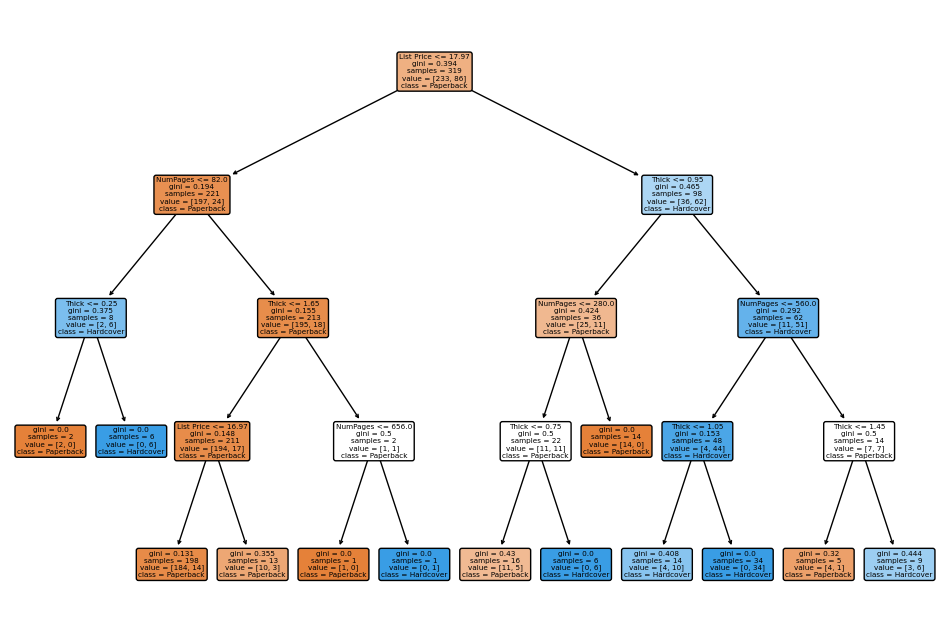

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


X = ab[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Train the decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.show()


Link to chatgpt: https://chatgpt.com/c/673fc0cf-625c-8010-a5e4-d7f19438e4d6

Summary:

Code for Visualizing a Decision Tree: You shared a code snippet to visualize a decision tree classifier for predicting book formats (Paperback vs. Hardcover). The model uses the features NumPages, Thick, and List Price, with a maximum depth of 4. You also requested an explanation of how predictions are made by this model.

Request to Repeat Problem: You asked to repeat the problem but specifically requested to visualize the decision tree with the same specifications (max_depth=4) for the clf2 model and explain the prediction process.

Answer and Explanation: I provided the updated code, followed by an explanation that the decision tree splits data based on thresholds of the features. Predictions are made based on the path followed in the tree, where each leaf node represents a predicted class determined by the majority class in that node.

# 6

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Assuming ab_reduced_noNaN_train and ab_reduced_noNaN_test are already defined

# 1. Define and Train the clf model (List Price only, max_depth=2)
X_train_clf = ab[['List Price']]
y_train_clf = pd.get_dummies(ab["Hard_or_Paper"])['H']
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# 2. Define and Train the clf2 model (NumPages, Thick, List Price, max_depth=4)
X_train_clf2 = ab[['NumPages', 'Thick', 'List Price']]
y_train_clf2 = pd.get_dummies(ab["Hard_or_Paper"])['H']
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

# 3. Make predictions on the test set
X_test_clf = ab[['List Price']]
y_test_clf = pd.get_dummies(ab["Hard_or_Paper"])['H']
X_test_clf2 = ab[['NumPages', 'Thick', 'List Price']]
y_test_clf2 = pd.get_dummies(ab["Hard_or_Paper"])['H']

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# 4. Compute confusion matrices
cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)

# 5. Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]  # True Positives (Hardcover predicted correctly)
TN_clf = cm_clf[0, 0]  # True Negatives (Paperback predicted correctly)
FP_clf = cm_clf[0, 1]  # False Positives (Paperback predicted as Hardcover)
FN_clf = cm_clf[1, 0]  # False Negatives (Hardcover predicted as Paperback)

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

# 6. Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]  # True Positives (Hardcover predicted correctly)
TN_clf2 = cm_clf2[0, 0]  # True Negatives (Paperback predicted correctly)
FP_clf2 = cm_clf2[0, 1]  # False Positives (Paperback predicted as Hardcover)
FN_clf2 = cm_clf2[1, 0]  # False Negatives (Hardcover predicted as Paperback)

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test_clf2, y_pred_clf2)

# Output the results for both models
print("Model 1 (clf) - Decision Tree Classifier (List Price only)")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nModel 2 (clf2) - Decision Tree Classifier (NumPages, Thick, List Price)")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Model 1 (clf) - Decision Tree Classifier (List Price only)
Sensitivity: 0.64
Specificity: 0.92
Accuracy: 0.84

Model 2 (clf2) - Decision Tree Classifier (NumPages, Thick, List Price)
Sensitivity: 0.73
Specificity: 0.97
Accuracy: 0.91


Link to chatgpt: https://chatgpt.com/c/673fc504-0414-8010-bcd2-99dee213c62b

Summary:

Decision Tree Classifier: You requested code to visualize a classification decision tree and explain how predictions are made using the DecisionTreeClassifier with specific features (NumPages, Thick, List Price) and a maximum depth of 4. I provided the code for training and plotting the decision tree, as well as an explanation of how the tree splits the data and makes predictions.

Confusion Matrix Analysis: You later requested code to create confusion matrices for two models (clf and clf2) using the test dataset (ab_reduced_noNaN_test), and to calculate the sensitivity, specificity, and accuracy for both models. I provided the necessary code for training the models, making predictions, computing the confusion matrices, and calculating the requested metrics for each model.

# 7

The difference between the 2 confusion matrices are due to the second atrice using more input features used by the classifiers in comparison to the first. More featured lead to better predictions, improving classification accuracy. 

Link to chatgpt: https://chatgpt.com/c/673fc9b1-a9bc-8010-975c-53ed97343d41

Summary:

You asked for clarification on the differences between two confusion matrices, which arise from the classifiers using different sets of features. The second model, which includes more features, likely performs better and yields a more accurate confusion matrix.
You prefer concise, direct answers, and would like all your French responses to be corrected.

# 8

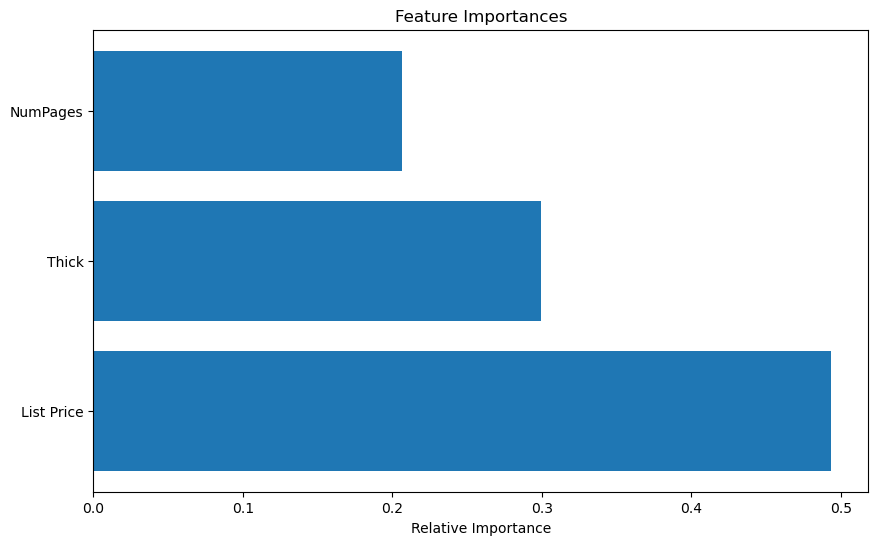

The most important feature for making predictions is: List Price


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is your trained decision tree classifier
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Reporting the most important feature
most_important_feature = features[indices[0]]
print(f"The most important feature for making predictions is: {most_important_feature}")


Link to chatgpt: https://chatgpt.com/c/673fcb8d-d334-8010-ac6f-94691e894488

Summary: 

You asked how to visualize feature importances for a decision tree classifier in scikit-learn (clf2), using .feature_names_in_ to label the features and identify the most important predictor.
I provided a code snippet that:
Extracts feature importances using clf2.feature_importances_.
Sorts the importances and plots them using matplotlib.
Reports the most important feature for making predictions based on the classifier.

# 9

In linear regression, coefficients represent expected change in variable for a one unit increase in a feature (other features remain constant), which provides a clear interpretation of inidividual effects. In a decision tree, feature importance represents how often and effectively a feature is used to split the data, apturing overall contribution to model accuracy without isolation of individual features. Therefore, feature importance is not as directly interpretable and dependent on the tree stucture.


Link to chatgpt: https://chatgpt.com/c/673fccd4-90e4-8010-9e9b-0f74d04d92da

Summary:

So far, we've discussed the differences between interpreting coefficients in linear regression and feature importances in decision trees. You prefer answers that are concise and direct, and you've asked for corrections in French responses when applicable. Let me know if there's anything else you'd like summarized!

# 10

Somewhat